Question 1 - Zipf's Law

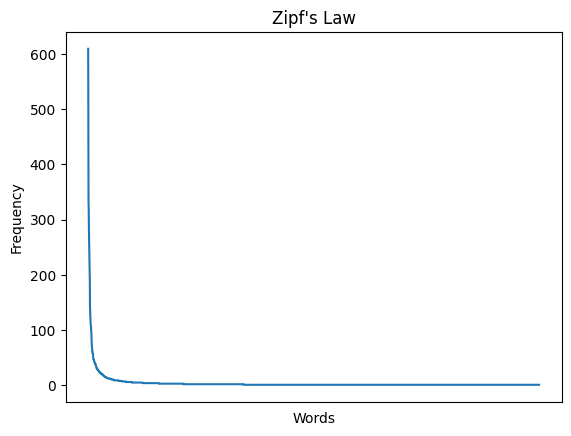

In [1]:
from post_parser_record import PostParserRecord
import matplotlib.pyplot as plt

# parse xml
PPR = PostParserRecord('Posts_Coffee.xml')
# initialize string that will hold all the titles
title_str = ""
# loop through all questions and add titles to title string
for i in PPR.map_questions:
    question = PPR.map_questions.get(i).title
    title_str = title_str + " " + question.lower()
# split string into string array
words = title_str.split()
# initialize dictionary for word frequency
freq_dict = {}
# loop through words array and add them to frequency dictionary while incrementing occurences by 1
for word in words:
    if word in freq_dict:
        freq_dict.update({word: freq_dict[word] + 1})
    else:
        freq_dict.update({word: 1})
# sort dictionary based on values from high to low
sortedByValues = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))
# create lists of both keys and values
rank = list(sortedByValues.keys())
frequency = list(sortedByValues.values())
# plot zipfs law graph
plt.plot(rank, frequency)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law')
# hides words from graph because there are too many words for such a small image
plt.xticks([])
plt.show()


Question 2 - Word Cloud with and without stopwords

Word cloud including stop words


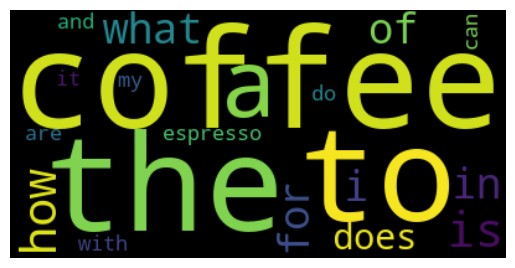

Word cloud removing stop words


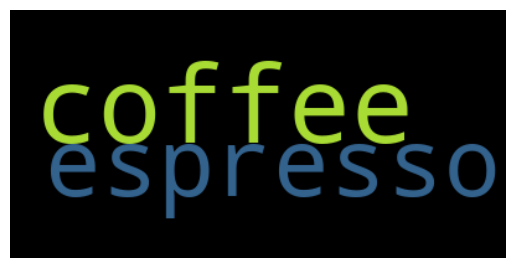

In [1]:
from post_parser_record import PostParserRecord
import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# stop words
stop_words = set(stopwords.words('english'))
# parse xml
PPR = PostParserRecord('Posts_Coffee.xml')
# initialize string that will hold all the titles
title_str = ""
# loop through all questions and add titles to title string
for i in PPR.map_questions:
    question = PPR.map_questions.get(i).title
    title_str = title_str + " " + question.lower()
# tokenize words and add to array
words = word_tokenize(title_str)
# initialize dictionary for word frequency
freq_dict = {}
# loop through words array and add them to frequency dictionary while incrementing occurences by 1
for word in words:
    if word in freq_dict:
        freq_dict.update({word: freq_dict[word] + 1})
    else:
        freq_dict.update({word: 1})
# sort dictionary based on values from high to low
sortedByValues = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))
# create lists of both keys and values
rank = list(sortedByValues.keys())
frequency = list(sortedByValues.values())
top_20_words = ''
# taking top 21 because '?' is number 1
for i in range(0, 21):
    top_20_words = top_20_words + " " + rank[i]
print("Word cloud including stop words")
# create wordcloud without stopwords and show it
wc = WordCloud(stopwords=[], normalize_plurals=False).generate(top_20_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
print("Word cloud removing stop words")
# create wordcloud with stopwords and show it
wc = WordCloud(stopwords=stop_words, normalize_plurals=False).generate(top_20_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()




These two word clouds show how stop words took up 18 of the top 20 words in the question titles.

Question 3 - Generate text from U.S presidents

The first thing we would need to do is scrape the internet for every president speech we can find. Thus we will need 2 things, websites that contain presidential speeches, and a way to scrape the data. A couple websites that contain this data are the American Presidency Project (http://www.presidency.ucsb.edu/) and the Miller Center (https://millercenter.org/the-presidency/presidential-speeches). Now that we have the data, we need a scraper. This is possible to do in python with the help of tools like Scrapy and BeautifulSoup. BeautifulSoup isn't as feature-rich as Scrapy, but it is considered easier to learn. However, if a task is hard/big enough, becoming proficient in Scrapy may be needed. Scrapers give us all the data that we tell it to, but we may need to clean it up after the fact. This is because the data may contain irrelevant data such as headers, footers, and citations. Since we just want the president's speeches, any text that they didn't say in their speech must be eradicated. Other preprocessing like setting text to lowercase, removing punctuation, and tokenizing the text into individual words must be done as well. Language models are typically stored in files such as CSV (comma-separated values) because of their ordered format. These are the general steps one would take to create a language model based on president's speech

Question 4: Wordpiece's differences from BPE

Byte-Pair Encoding (BPE) is a quite simple subword tokenization technique. It finds the most frequent pairs in a corpus and adds them to the vocabulary until it reaches the desired vocabulary size. Wordpiece is similar in that it is also a subword tokenization technique, however it adds its pairs a bit differently. Instead of just going by the frequency of the pairs, it takes into account the frequency of the two individual parts that make up the pair. It uses this formula to calculate a score, (pair_frequency)/(first_element_frequency * second_element_frequency) = score. This can affect what pairs are ultimately included in the vocabulary. Lets take this corpus for example, (low_, 5), (lowest_, 2), (newer_, 6), (wider_, 3), (new_, 2). The initial vocabulary would include each letter present, (_, d, e, i, l, n, o, r, s, t, w). BPE would add pairs in this order, "er", "er_" ("_" is causing italicization), "ne", "new", "lo" ..... until it reaches the desired vocabulary size. Wordpiece would add new pairs quite differently from BPE. It would first split the corpus into something like this, ("l" "##o" "##w", 5), ("l" "##o" "##w" "##e" "##s" "##t", 2), ("n" "##e" "##w" "##e" "##r", 6), ("w" "##i" "##d" "##e" "##r", 3), ("n" "##e" "##w", 2). The initial vocabulary with frequency is ["n" - 8, "l" - 7, "w" - 3, "##e" - 19, "##w" - 18, "##r" - 9, "##o" - 7, "##d" - 3, "##i" - 3, "##t" - 2, "##s" - 2]. BPE would add the pair of "##e" and "##r" first, and in wordpiece their score would be 9/19*9 = 1/19. Let's find some other common pairs and compare scores. "##s" and "##t" have low frequencies and their score would be, 2/2*2 = 1/2. This score is much higher than 1/19. Thus this shows the biggest difference between wordpiece and BPE, it would be a while before BPE adds the pair of "st" due to their low frequencies, yet it has such a high score in wordpieces model. It makes sense in this small corpus since everytime there is an "s", "t" comes after it. The pair of "##i" and "##d" has a wordpiece score of 6/3*3 = 2/3. This is even higher than "##s" and "##t", which was 1/2. So far we will be adding to our vocabulary in this order, "##id" then "##st". The pair of "l" and "##o" have a wordpiece score of     7/7*7 = 1/7. This isn't higher than our top 2, so it will be last in our current list. This process is quite difficult for a person to calculate a perfect list, which is why this is a computer algorithm. It is difficult even with a 5 word corpus! Depending on vocabulary size, these two subword tokenization techniques can have quite varying results.